In [27]:
# -*- coding:utf-8 -*-
import tensorflow as tf
from tensorflow import keras
import numpy as np
import random
import cv2
import os

orignal =[]


In [28]:
#Read all test videos
test=[]
f= 'sample_images_RA'
Test_videos =[]
test_list = open('Labels/test.txt','r')
for line in test_list:
    name = line.split(" ")[0]
    x=line.split(" ")[-1]
    test.append(x[0])
    Test_videos.append(f+"/"+name)

In [29]:
for i in test:
    if i=='0':
        orignal.append('normal')
    else:
        orignal.append('abnormal')

In [30]:
#To load pre-trained model, trained on 5 classes 
#model = tf.keras.models.load_model('Trained Models/model_P3D.h5',compile=False)


#To load pre-trained weights,
model = tf.keras.models.load_model('Trained Models/weights_model_P3D.hdf5',compile=False)

In [31]:
#two classes labels
labels0 ={0:'normal', 1:'abnormal'}
prediction = []

In [7]:
def play_video(frames, frame_rate=5):
    """
    Play a sequence of frames as a video.

    Parameters:
    - frames: List of frames (numpy arrays representing images).
    - frame_rate: Frames per second (default is 25).
    """
    if not frames:
        print("No frames to play.")
        return

    # Get the height and width from the first frame
    height, width, _ = frames[0].shape
    size = (width, height)

    # Create a VideoWriter object to save the video
    video_writer = cv2.VideoWriter('output_video.avi', cv2.VideoWriter_fourcc(*'DIVX'), frame_rate, size)

    # Display each frame and write it to the video file
    for frame in frames:
        cv2.imshow('Video Player', frame)
        video_writer.write(frame)

        # Break the loop if the 'q' key is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the VideoWriter and close the OpenCV window
    video_writer.release()
    cv2.destroyAllWindows()

In [32]:
for video in Test_videos:
    vid = []  # reads frames of videos
    abnor = 0  # initialize abnormal count with 0
    path = video
    images = os.listdir(path)

    # Define frame drop rate
    frame_drop_rate = 3  # For example, drop every 2nd frame

    for idx, img in enumerate(images):
        if idx % frame_drop_rate == 0:  # Skip frames based on frame_drop_rate
            continue

        img_path = os.path.join(path, img)
        img2 = cv2.imread(img_path)
        img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
        vid.append(cv2.resize(img2, (112, 112)))

        if len(vid) == 32:
            X = np.array(vid, dtype=np.float32).transpose((2, 1, 0, 3))
            output = model.predict_on_batch(np.array([X]))

            if abnor == 3:
                break

            if len(output) > 0:
                str1 = labels0[np.argmax(output)]
                if str1 in ['vandalism', 'fighting', 'shooting', 'hockeyfight']:
                    abnor += 1
                else:
                    abnor = 0

            vid = []

    if abnor == 3:
        prediction.append('abnormal')
    else:
        prediction.append('normal')


In [ ]:
len(prediction)

16

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
j=0
for i in Test_videos:
    print(i, orignal[j], prediction[j])
    j=j+1

sample_images_RA/0Normal/1Fighting037_x264 normal normal
sample_images_RA/0Normal/1Fighting038_x264 normal normal
sample_images_RA/0Normal/1Fighting039_x264 normal normal
sample_images_RA/0Normal/1Shooting002_x264 normal normal
sample_images_RA/0Normal/1Shooting003_x264 normal normal
sample_images_RA/0Normal/1Shooting004_x264 normal normal
sample_images_RA/0Normal/1Vandalism019_x264 normal normal
sample_images_RA/0Normal/1Vandalism020_x264 normal normal
sample_images_RA/fighting/2Fighting015_x264 abnormal normal
sample_images_RA/fighting/2Fighting016_x264 abnormal normal
sample_images_RA/shooting/2Shooting038_x264 abnormal normal
sample_images_RA/shooting/2Shooting053_x264 abnormal normal
sample_images_RA/shooting/2Shooting054_x264 abnormal normal
sample_images_RA/vandalism/2Vandalism036_x264 abnormal normal
sample_images_RA/vandalism/2Vandalism037_x264 abnormal normal
sample_images_RA/vandalism/2Vandalism038_x264 abnormal normal


<AxesSubplot:>

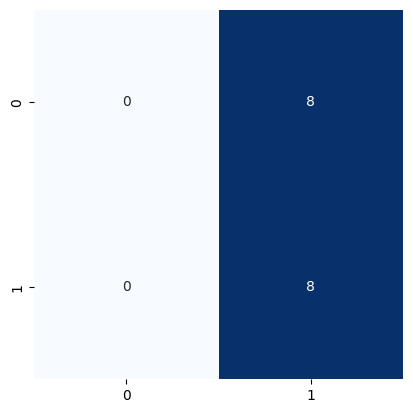

In [ ]:
conf_mat = confusion_matrix(orignal, prediction)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)